In [ ]:
from google.colab import drive


drive.mount("/content/drive")

In [ ]:
!pip install timm

!git clone https://github.com/isl-org/MiDaS.git
%cd MiDaS

In [ ]:
!python run.py --input_path "/content/drive/MyDrive/Colab Notebooks/Research/Other Modules/Measure Stem Radius/data" --model_weights "/content/drive/MyDrive/Colab Notebooks/Research/Other Modules/Measure Stem Radius/model/dpt_large-midas-2f21e586.pt" --model_type dpt_large

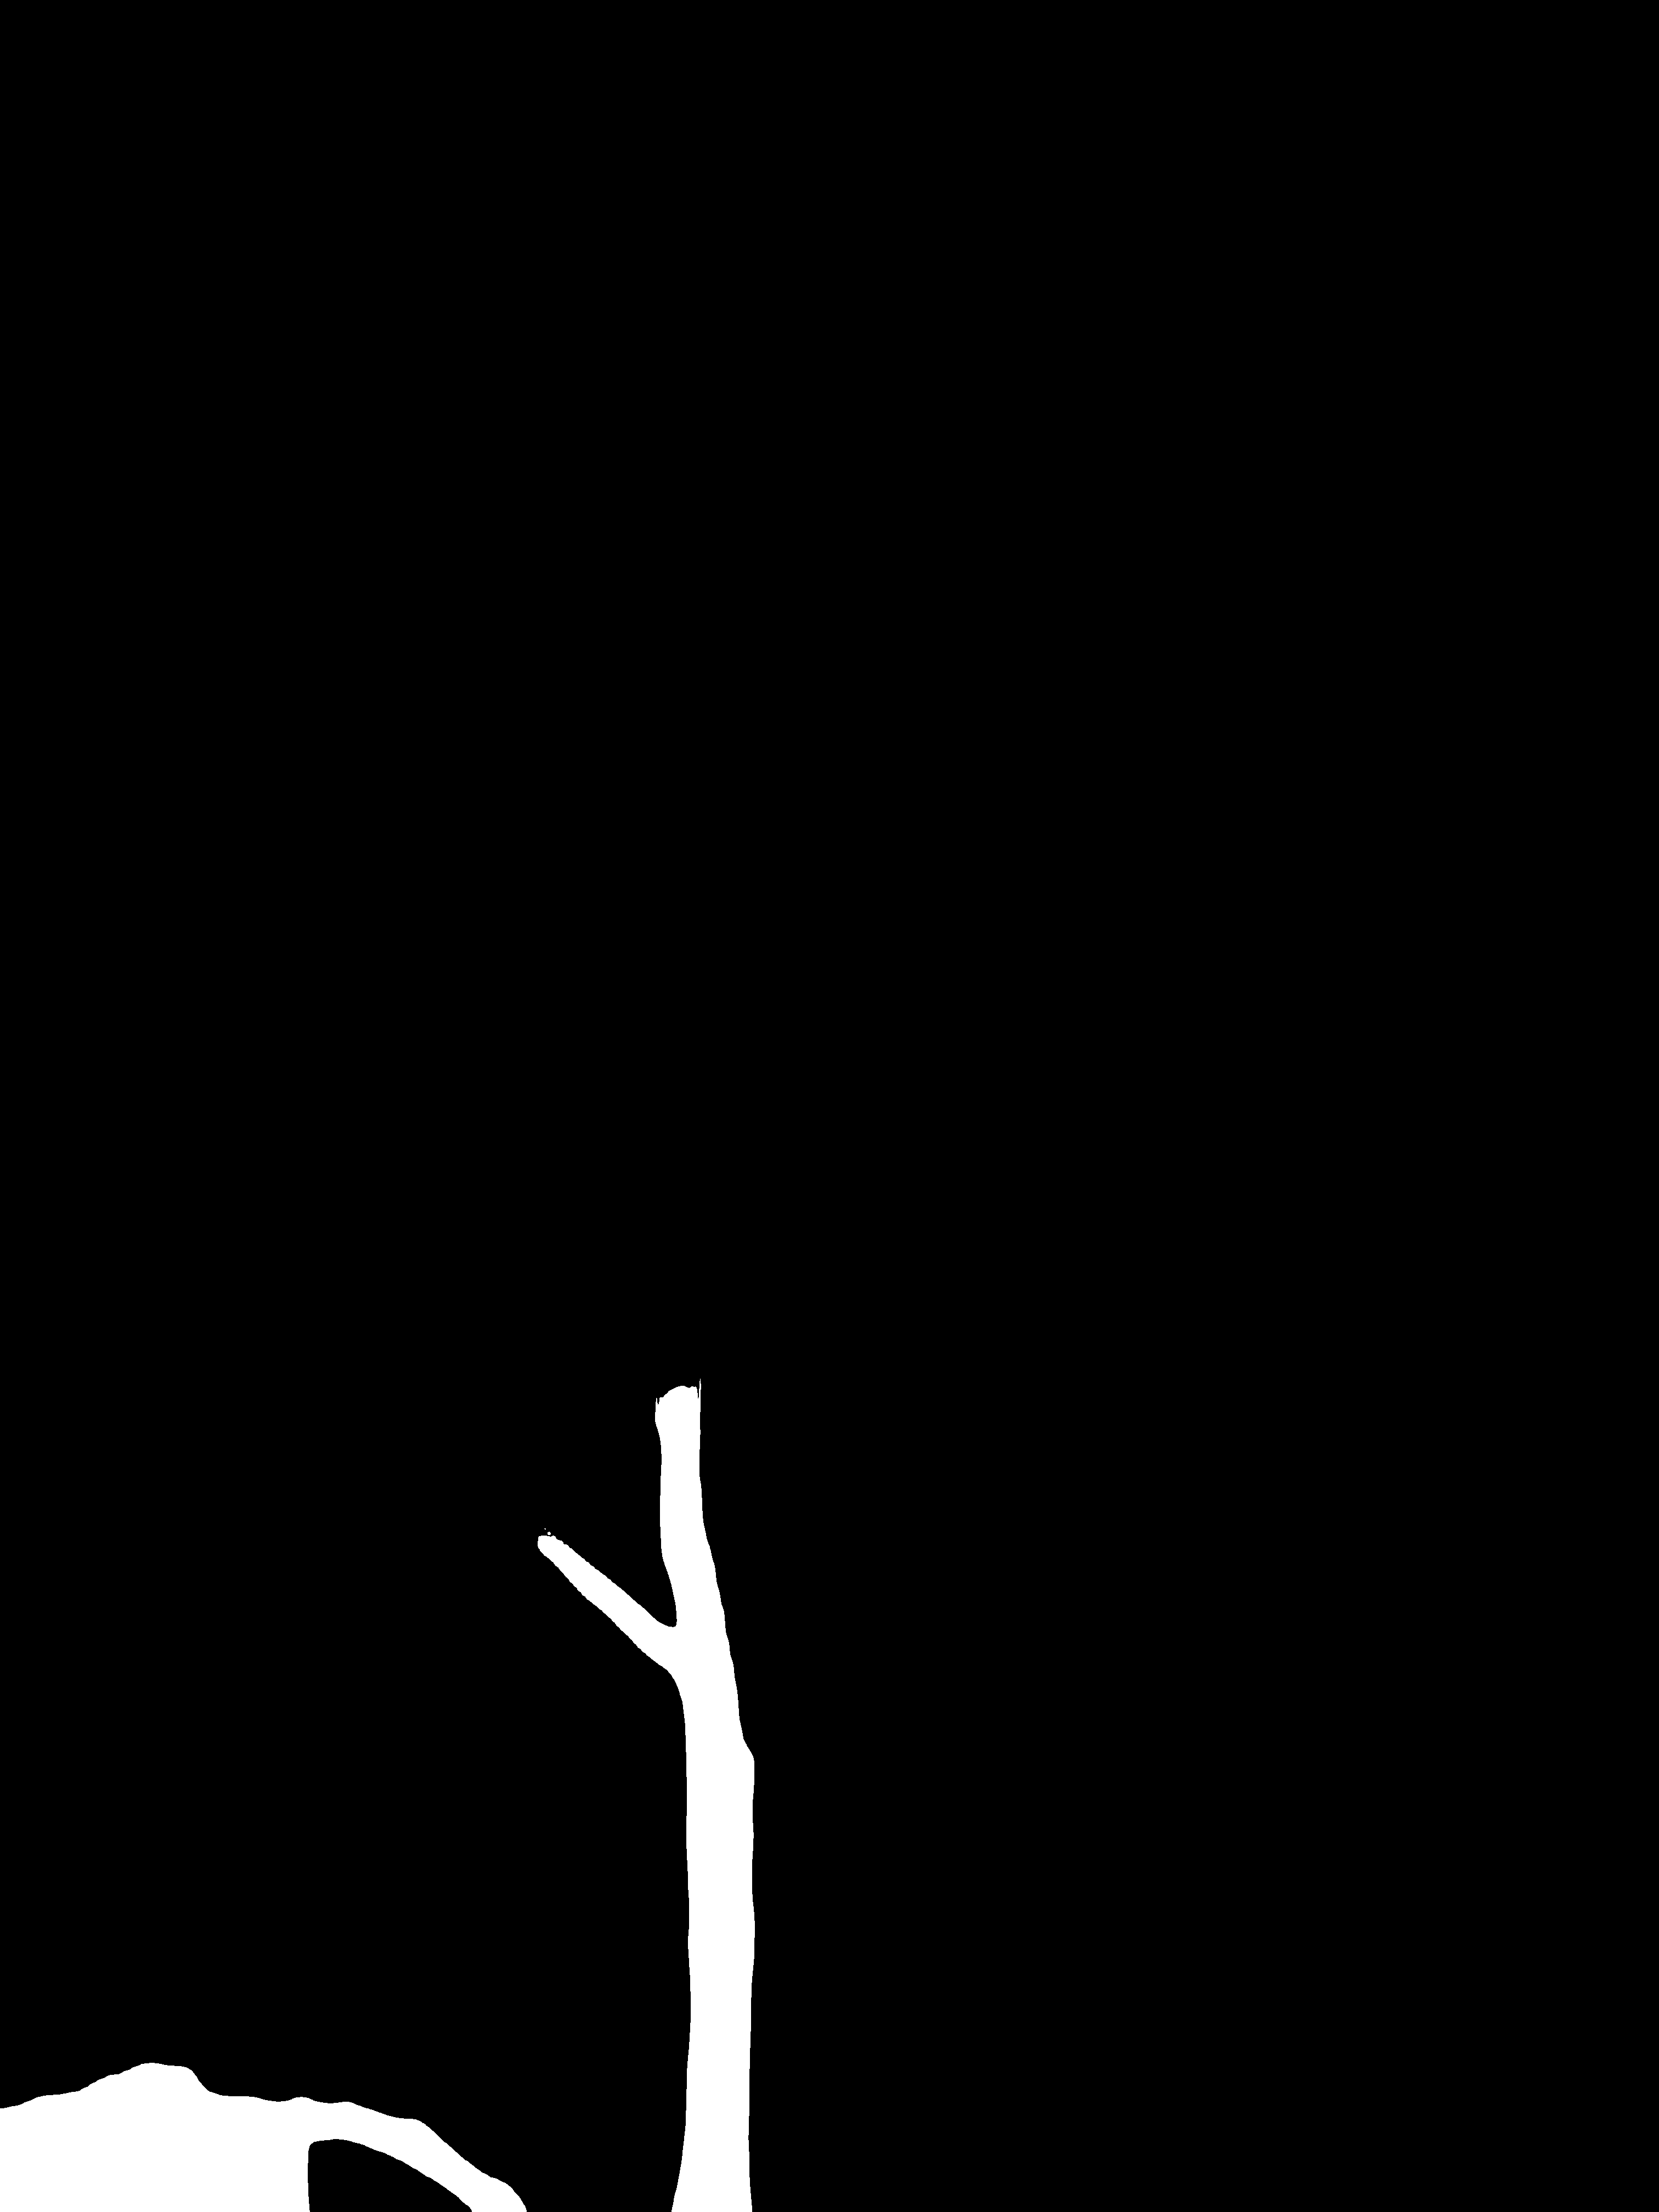

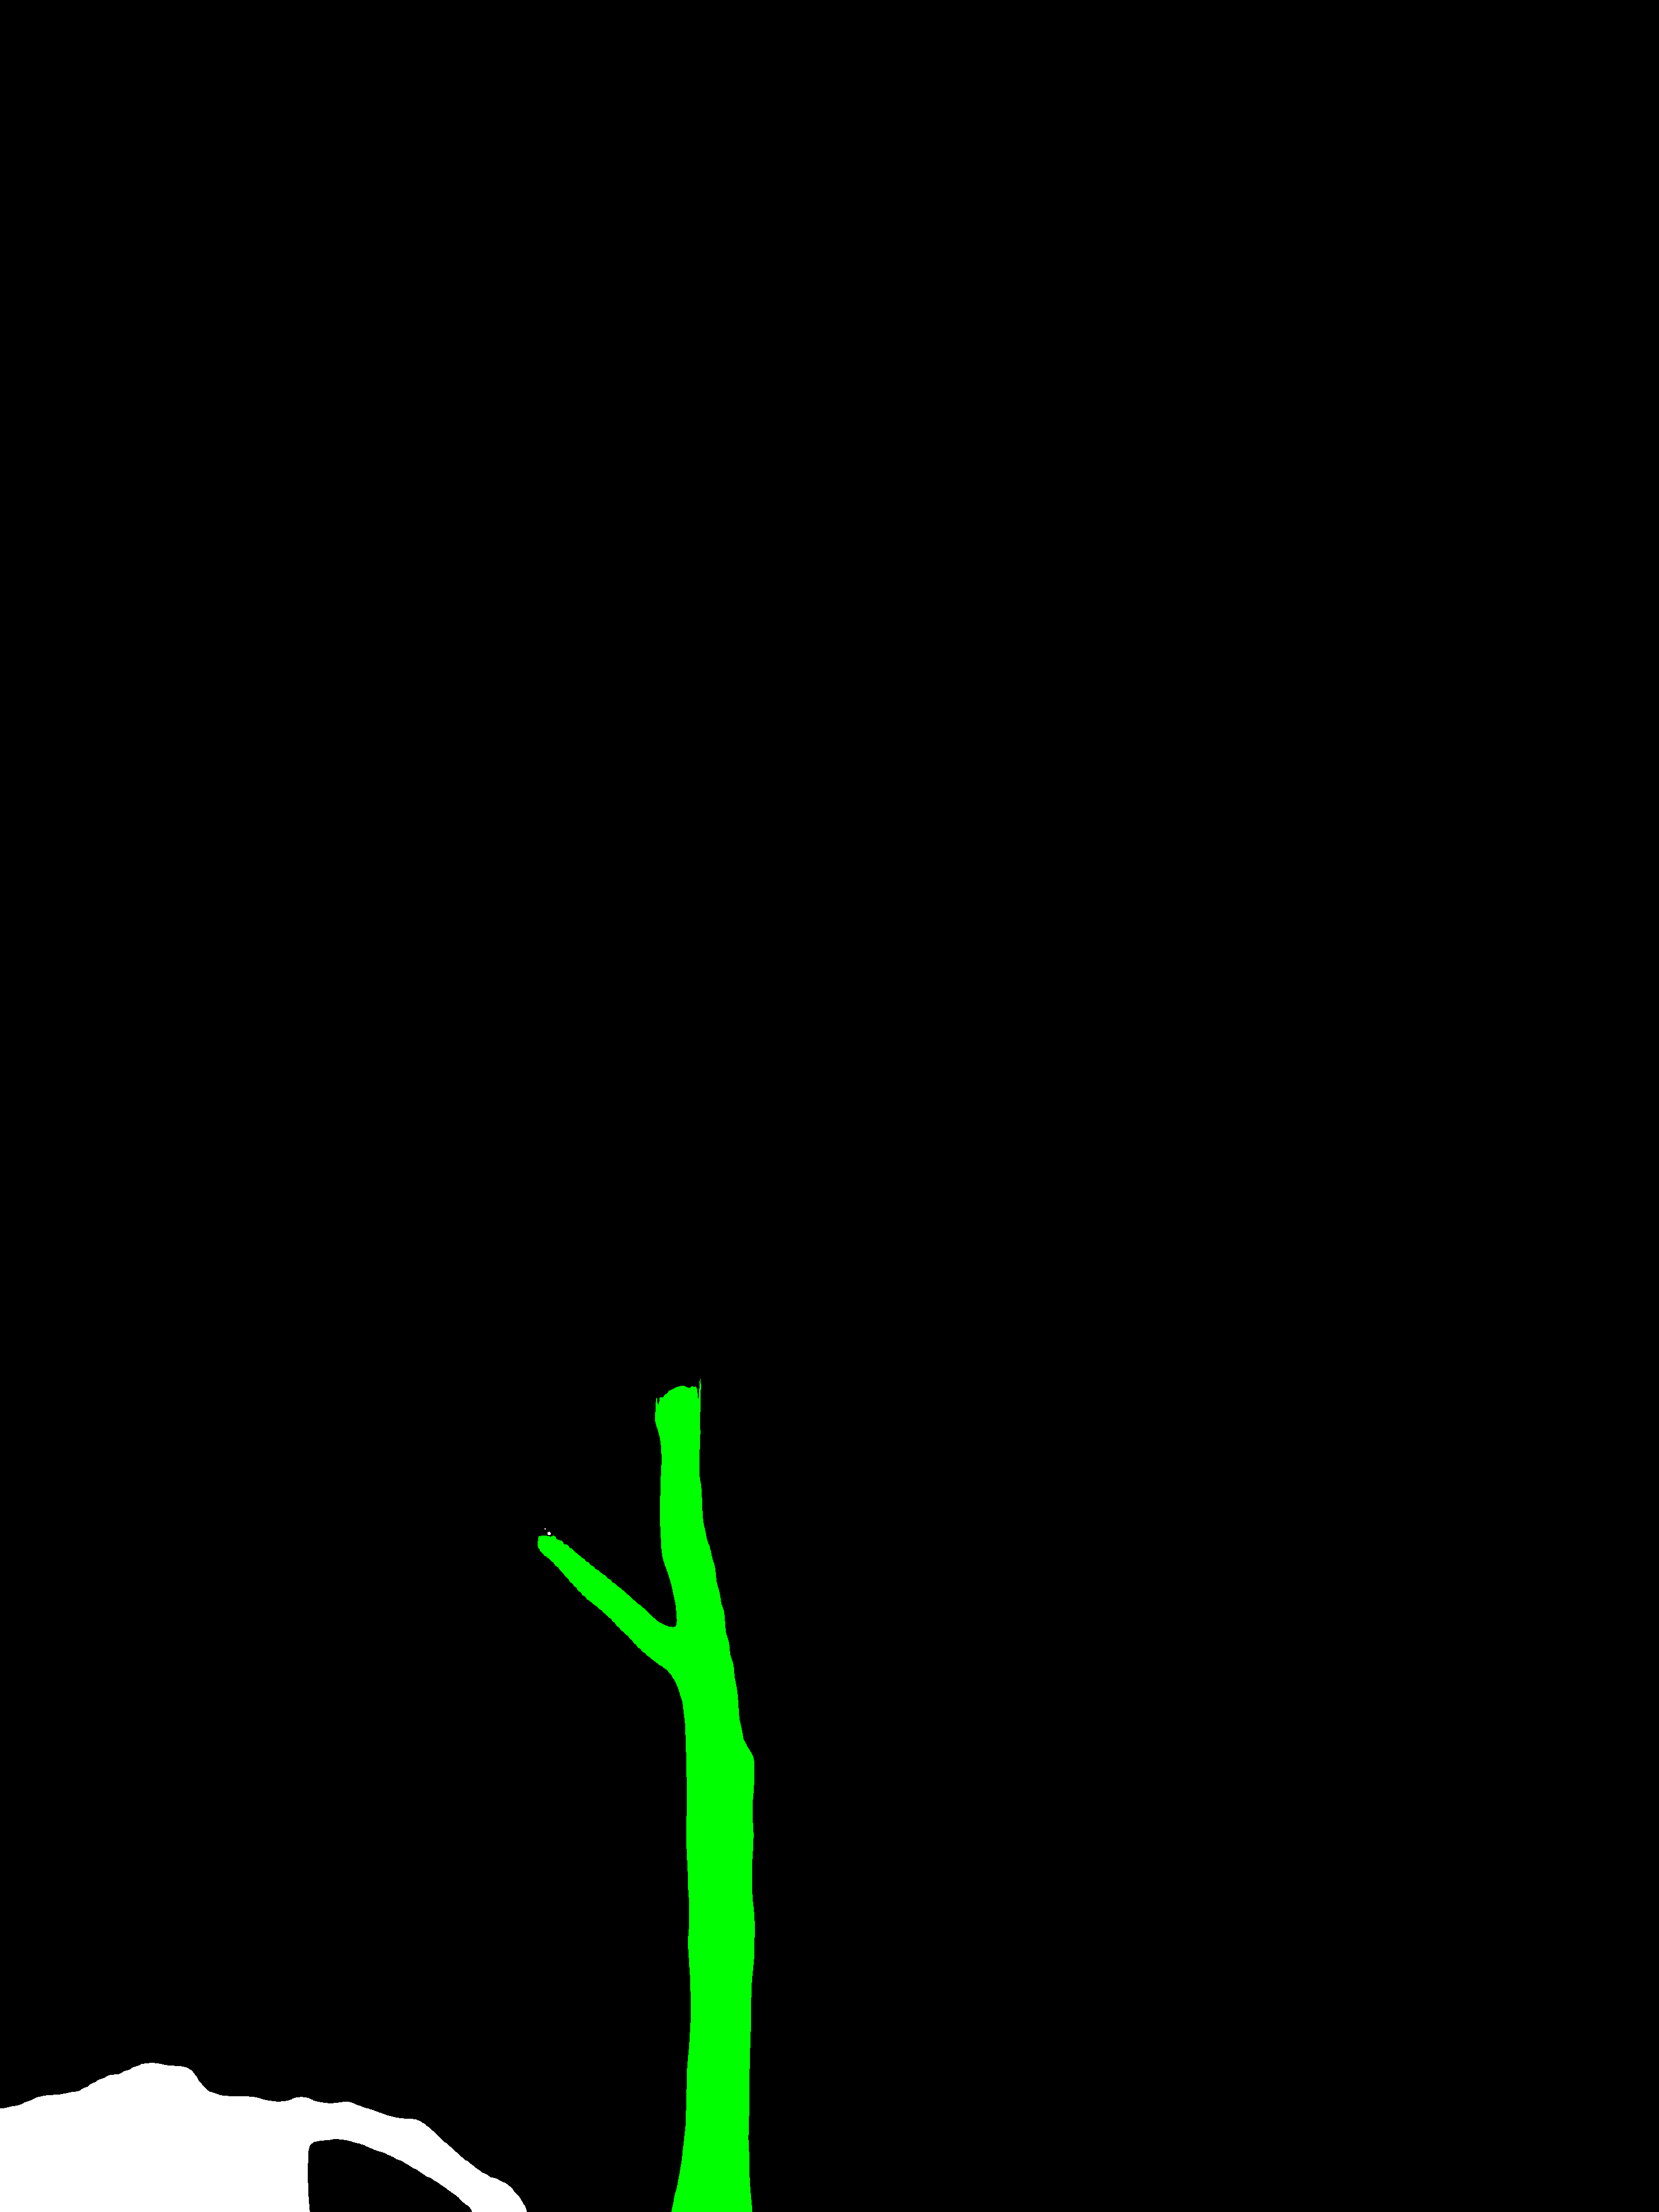

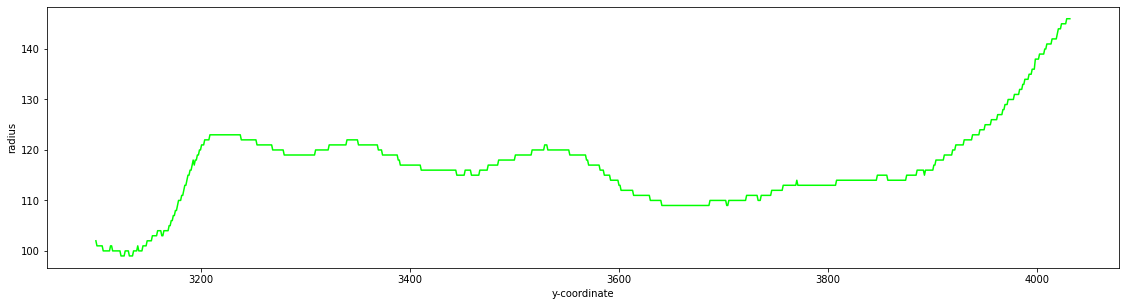

In [16]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


GREEN = (0, 255, 0)
THRESHOLD = 210

img = cv2.imread("/content/MiDaS/output/sample.png", 0)
ret, thresh = cv2.threshold(img, THRESHOLD, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Remove small contours
contours = [contour for contour in contours if cv2.contourArea(contour) > img.size * 0.01]

# Find the contour that is closest to the center of an image
x_center = img.shape[0] // 2

dist_list = []
for contour in contours:
  x_coords = contour[:, :, 0].flatten()
  dist = np.abs(x_coords - x_center).mean()
  dist_list.append(dist)

stem_contour = contours[dist_list.index(min(dist_list))]
filled_img = cv2.fillPoly(cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR), [stem_contour[:, 0, :]], GREEN)
cv2_imshow(filled_img)

green_area = (filled_img == GREEN).all(axis=2)
leftmost_green_pixels = green_area.argmax(axis=1)
rightmost_green_pixels = (green_area.shape[1] - 1) - np.flip(green_area, axis=1).argmax(axis=1)

thicknesses = rightmost_green_pixels - leftmost_green_pixels

plt.figure(figsize=(19.2, 4.8))
plt.xlabel("y-coordinate")
plt.ylabel("radius")
sns.lineplot(x=range(3100, len(thicknesses)), y=thicknesses[3100:], color="#00FF00")